In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'10',
  'convert':'EUR'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '19d8a6fe-9b02-4cd6-8262-2b81f365fde8',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-07-19T08:22:12.872Z', 'error_code': 0, 'error_message': None, 'elapsed': 816, 'credit_count': 1, 'notice': None, 'total_count': 9990}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11607, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [3]:
type(data)


dict

In [4]:
import pandas as pd

In [5]:
# To show all columns

pd.set_option('display.max_columns', None)

In [6]:
df = pd.json_normalize(data['data'])

In [7]:
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.EUR.price,quote.EUR.volume_24h,quote.EUR.volume_change_24h,quote.EUR.percent_change_1h,quote.EUR.percent_change_24h,quote.EUR.percent_change_7d,quote.EUR.percent_change_30d,quote.EUR.percent_change_60d,quote.EUR.percent_change_90d,quote.EUR.market_cap,quote.EUR.market_cap_dominance,quote.EUR.fully_diluted_market_cap,quote.EUR.tvl,quote.EUR.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11607,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.972768e+07,1.972768e+07,False,NaN,1,NaN,NaN,None,2024-07-19T08:21:00.000Z,58360.579526,2.508146e+10,-9.1739,-0.780445,-1.986748,11.018794,-2.565640,-5.090222,-0.498332,1.151319e+12,53.8843,1.225572e+12,None,2024-07-19T08:21:03.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-19 08:29:11.181627
1,1027,Ethereum,ETH,ethereum,9149,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202242e+08,1.202242e+08,True,NaN,2,NaN,NaN,None,2024-07-19T08:20:00.000Z,3110.515878,1.397173e+10,-2.7154,-1.177871,-1.695897,9.822916,-4.239620,9.321577,10.912897,3.739592e+11,17.4971,3.739592e+11,None,2024-07-19T08:21:03.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-19 08:29:11.181627
2,825,Tether USDt,USDT,tether,92015,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.136962e+11,1.170722e+11,True,NaN,3,NaN,NaN,None,2024-07-19T08:20:00.000Z,0.918905,4.918381e+10,-8.4564,-0.022018,-0.016504,-0.032580,0.004489,-0.020182,-0.069524,1.044760e+11,4.8883,1.075782e+11,None,2024-07-19T08:21:03.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-19 08:29:11.181627
3,1839,BNB,BNB,bnb,2194,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475820e+08,1.475820e+08,False,NaN,4,NaN,NaN,None,2024-07-19T08:20:00.000Z,521.244832,1.497402e+09,-3.2726,-0.936542,-1.090369,8.523754,-5.505629,-1.637384,1.579386,7.692633e+10,3.5993,7.692633e+10,None,2024-07-19T08:21:03.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-19 08:29:11.181627
4,5426,Solana,SOL,solana,707,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.642726e+08,5.804394e+08,True,NaN,5,NaN,NaN,None,2024-07-19T08:20:00.000Z,146.643769,2.309337e+09,15.9234,-2.473208,0.127937,17.608086,14.582791,-10.322170,12.155273,6.808268e+10,3.1855,8.511782e+10,None,2024-07-19T08:21:03.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-19 08:29:11.181627
5,3408,USDC,USDC,usd-coin,21045,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.366431e+10,3.366431e+10,False,NaN,6,NaN,NaN,None,2024-07-19T08:20:00.000Z,0.919075,5.680230e+09,-3.6682,0.001095,0.011333,0.007492,0.011382,0.003626,-0.015051,3.094003e+10,1.4476,3.094003e+10,None,2024-07-19T08:21:03.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-19 08:29:11.181627
6,52,XRP,XRP,xrp,1355,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.590948e+10,9.998743e+10,False,NaN,7,NaN,NaN,None,2024-07-19T08:21:00.000Z,0.503465,2.151195e+09,-39.5727,-1.300180,-4.710513,18.010102,11.978120,6.541321,6.678077,2.814848e+10,1.3170,5.034652e+10,None,2024-07-19T08:21:03.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-19 08:29:11.181627
7,11419,Toncoin,TON,toncoin,465,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.512117e+09,5.109193e+09,True,NaN,8,3.414167e+09,2.479031e+10,None,2024-07-19T08:20:00.000Z,6.672821,1.850124e+08,-9.3188,-0.464933,0.864945,-1.064699,4.451532,14.402372,17.515989,1.676291e+10,0.7843,3.409273e+10,None,2024-07-19T08:21:03.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-19 08:29:11.181627
8,74,Dogecoin,DOGE,dogecoin,1025,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me..

In [8]:
def api_runner():
    global df

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'10',
      'convert':'EUR'
                }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '19d8a6fe-9b02-4cd6-8262-2b81f365fde8',
        }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = df.append(df2)
    

In [9]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('api_runner completed successfully')
    sleep(60) #sleep for 1 minute
exit()

{'status': {'timestamp': '2024-07-19T08:29:24.216Z', 'error_code': 0, 'error_message': None, 'elapsed': 33, 'credit_count': 1, 'notice': None, 'total_count': 9990}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11607, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

KeyboardInterrupt: 

In [10]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.EUR.price,quote.EUR.volume_24h,quote.EUR.volume_change_24h,quote.EUR.percent_change_1h,quote.EUR.percent_change_24h,quote.EUR.percent_change_7d,quote.EUR.percent_change_30d,quote.EUR.percent_change_60d,quote.EUR.percent_change_90d,quote.EUR.market_cap,quote.EUR.market_cap_dominance,quote.EUR.fully_diluted_market_cap,quote.EUR.tvl,quote.EUR.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11607,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.972768e+07,1.972768e+07,False,NaN,1,NaN,NaN,None,2024-07-19T08:21:00.000Z,58360.579526,2.508146e+10,-9.1739,-0.780445,-1.986748,11.018794,-2.565640,-5.090222,-0.498332,1.151319e+12,53.8843,1.225572e+12,None,2024-07-19T08:21:03.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-19 08:29:11.181627
1,1027,Ethereum,ETH,ethereum,9149,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202242e+08,1.202242e+08,True,NaN,2,NaN,NaN,None,2024-07-19T08:20:00.000Z,3110.515878,1.397173e+10,-2.7154,-1.177871,-1.695897,9.822916,-4.239620,9.321577,10.912897,3.739592e+11,17.4971,3.739592e+11,None,2024-07-19T08:21:03.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-19 08:29:11.181627
2,825,Tether USDt,USDT,tether,92015,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.136962e+11,1.170722e+11,True,NaN,3,NaN,NaN,None,2024-07-19T08:20:00.000Z,0.918905,4.918381e+10,-8.4564,-0.022018,-0.016504,-0.032580,0.004489,-0.020182,-0.069524,1.044760e+11,4.8883,1.075782e+11,None,2024-07-19T08:21:03.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-19 08:29:11.181627
3,1839,BNB,BNB,bnb,2194,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475820e+08,1.475820e+08,False,NaN,4,NaN,NaN,None,2024-07-19T08:20:00.000Z,521.244832,1.497402e+09,-3.2726,-0.936542,-1.090369,8.523754,-5.505629,-1.637384,1.579386,7.692633e+10,3.5993,7.692633e+10,None,2024-07-19T08:21:03.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-19 08:29:11.181627
4,5426,Solana,SOL,solana,707,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.642726e+08,5.804394e+08,True,NaN,5,NaN,NaN,None,2024-07-19T08:20:00.000Z,146.643769,2.309337e+09,15.9234,-2.473208,0.127937,17.608086,14.582791,-10.322170,12.155273,6.808268e+10,3.1855,8.511782e+10,None,2024-07-19T08:21:03.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-19 08:29:11.181627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,3408,USDC,USDC,usd-coin,21045,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.368906e+10,3.368906e+10,False,NaN,6,NaN,NaN,None,2024-07-19T08:34:00.000Z,0.919156,5.718571e+09,-2.4327,-0.031719,-0.007468,-0.022838,0.004309,0.001817,-0.008114,3.096552e+10,1.4479,3.096552e+10,None,2024-07-19T08:35:03.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-19 08:36:26.109149
6,52,XRP,XRP,xrp,1355,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.590948e+10,9.998743e+10,False,NaN,7,NaN,NaN,None,2024-07-19T08:35:00.000Z,0.504808,2.108734e+09,-41.5262,-0.621692,-3.922060,18.485682,12.529105,6.809991,6.804956,2.822353e+10,1.3197,5.048076e+10,None,2024-07-19T08:35:03.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-19 08:36:26.109149
7,11419,Toncoin,TON,toncoin,465,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.512120e+09,5.109196e+09,True,NaN,8,3.414167e+09,2.481136e+10,None,2024-07-19T08:34:00.000Z,6.680128,1.847207e+08,-7.4803,-0.374085,0.988283,-0.696875,5.179196,14.436320,15.987280,1.678128e+10,0.7846,3.413008e+10,None,2024-07-19T08:35:03.000Z

In [11]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [12]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.EUR.price,quote.EUR.volume_24h,quote.EUR.volume_change_24h,quote.EUR.percent_change_1h,quote.EUR.percent_change_24h,quote.EUR.percent_change_7d,quote.EUR.percent_change_30d,quote.EUR.percent_change_60d,quote.EUR.percent_change_90d,quote.EUR.market_cap,quote.EUR.market_cap_dominance,quote.EUR.fully_diluted_market_cap,quote.EUR.tvl,quote.EUR.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11607,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19727678.00000,19727678.00000,False,NaN,1,NaN,NaN,None,2024-07-19T08:21:00.000Z,58360.57953,25081464469.41619,-9.17390,-0.78045,-1.98675,11.01879,-2.56564,-5.09022,-0.49833,1151318720783.06860,53.88430,1225572170046.79395,None,2024-07-19T08:21:03.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-19 08:29:11.181627
1,1027,Ethereum,ETH,ethereum,9149,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120224183.73337,120224183.73337,True,NaN,2,NaN,NaN,None,2024-07-19T08:20:00.000Z,3110.51588,13971734406.70650,-2.71540,-1.17787,-1.69590,9.82292,-4.23962,9.32158,10.91290,373959232422.06226,17.49710,373959232422.06006,None,2024-07-19T08:21:03.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-19 08:29:11.181627
2,825,Tether USDt,USDT,tether,92015,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,113696229620.94470,117072162581.67705,True,NaN,3,NaN,NaN,None,2024-07-19T08:20:00.000Z,0.91890,49183809683.64312,-8.45640,-0.02202,-0.01650,-0.03258,0.00449,-0.02018,-0.06952,104476012325.25839,4.88830,107578173362.53220,None,2024-07-19T08:21:03.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-19 08:29:11.181627
3,1839,BNB,BNB,bnb,2194,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147581950.72010,147581950.72010,False,NaN,4,NaN,NaN,None,2024-07-19T08:20:00.000Z,521.24483,1497402459.47888,-3.27260,-0.93654,-1.09037,8.52375,-5.50563,-1.63738,1.57939,76926329088.39264,3.59930,76926329088.39609,None,2024-07-19T08:21:03.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-19 08:29:11.181627
4,5426,Solana,SOL,solana,707,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,464272575.50481,580439367.68909,True,NaN,5,NaN,NaN,None,2024-07-19T08:20:00.000Z,146.64377,2309337345.54513,15.92340,-2.47321,0.12794,17.60809,14.58279,-10.32217,12.15527,68082680293.57674,3.18550,85117816526.66759,None,2024-07-19T08:21:03.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-19 08:29:11.181627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,3408,USDC,USDC,usd-coin,21045,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33689062326.41721,33689062326.41721,False,NaN,6,NaN,NaN,None,2024-07-19T08:34:00.000Z,0.91916,5718570964.30680,-2.43270,-0.03172,-0.00747,-0.02284,0.00431,0.00182,-0.00811,30965517960.85383,1.44790,30965517960.85735,None,2024-07-19T08:35:03.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-19 08:36:26.109149
6,52,XRP,XRP,xrp,1355,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55909481874.00000,99987431729.00000,False,NaN,7,NaN,NaN,None,2024-07-19T08:35:00.000Z,0.50481,2108734248.77316,-41.52620,-0.62169,-3.92206,18.48568,12.52911,6.80999,6.80496,28223531123.53525,1.31970,50480759573.37644,None,2024-07-19T08:35:03.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-19 08:36:26.109149
7,11419,Toncoin,TON,toncoin,465,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2512119603.68702,5109195726.03961,True,NaN,8,3414166606.00000,24811356748.68781,None,2024-07-19T08:

In [13]:
df.columns

Index(['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added',
       'tags', 'max_supply', 'circulating_supply', 'total_supply',
       'infinite_supply', 'platform', 'cmc_rank',
       'self_reported_circulating_supply', 'self_reported_market_cap',
       'tvl_ratio', 'last_updated', 'quote.EUR.price', 'quote.EUR.volume_24h',
       'quote.EUR.volume_change_24h', 'quote.EUR.percent_change_1h',
       'quote.EUR.percent_change_24h', 'quote.EUR.percent_change_7d',
       'quote.EUR.percent_change_30d', 'quote.EUR.percent_change_60d',
       'quote.EUR.percent_change_90d', 'quote.EUR.market_cap',
       'quote.EUR.market_cap_dominance', 'quote.EUR.fully_diluted_market_cap',
       'quote.EUR.tvl', 'quote.EUR.last_updated', 'platform.id',
       'platform.name', 'platform.symbol', 'platform.slug',
       'platform.token_address', 'timestamp'],
      dtype='object')

In [15]:
df3 = df[['name','quote.EUR.price','timestamp']]
df3

,name,quote.EUR.price,timestamp
0,Bitcoin,58360.57953,2024-07-19 08:29:11.181627
1,Ethereum,3110.51588,2024-07-19 08:29:11.181627
2,Tether USDt,0.91890,2024-07-19 08:29:11.181627
3,BNB,521.24483,2024-07-19 08:29:11.181627
4,Solana,146.64377,2024-07-19 08:29:11.181627
...,...,...,...
5,USDC,0.91916,2024-07-19 08:36:26.109149
6,XRP,0.50481,2024-07-19 08:36:26.109149
7,Toncoin,6.68013,2024-07-19 08:36:26.109149
8,Dogecoin,0.10925,2024-07-19 08:36:26.109149


In [16]:
df3['timestamp'].value_counts()

2024-07-19 08:29:11.181627    10
2024-07-19 08:29:24.270120    10
2024-07-19 08:30:24.514650    10
2024-07-19 08:31:24.799665    10
2024-07-19 08:32:25.072844    10
2024-07-19 08:33:25.323541    10
2024-07-19 08:34:25.579144    10
2024-07-19 08:35:25.856019    10
2024-07-19 08:36:26.109149    10
Name: timestamp, dtype: int64

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [19]:
# Pivot the DataFrame
pivot_df = df3.pivot(index='timestamp', columns='name', values='quote.EUR.price')
pivot_df

name,BNB,Bitcoin,Cardano,Dogecoin,Ethereum,Solana,Tether USDt,Toncoin,USDC,XRP
timestamp,,,,,,,,,,
2024-07-19 08:29:11.181627,521.24483,58360.57953,0.38548,0.10862,3110.51588,146.64377,0.91890,6.67282,0.91908,0.50347
2024-07-19 08:29:24.270120,521.74695,58340.30273,0.38609,0.10883,3104.22896,147.08837,0.91895,6.67244,0.91901,0.50310
2024-07-19 08:30:24.514650,522.02672,58359.83145,0.38649,0.10884,3106.56118,147.10072,0.91885,6.67086,0.91899,0.50300
2024-07-19 08:31:24.799665,522.09374,58382.38846,0.38650,0.10883,3108.51022,147.20708,0.91877,6.67128,0.91894,0.50292
2024-07-19 08:32:25.072844,522.15339,58404.58457,0.38648,0.10884,3109.02411,147.25190,0.91882,6.67097,0.91894,0.50231
2024-07-19 08:33:25.323541,522.42849,58475.63050,0.38660,0.10891,3109.89957,147.52756,0.91891,6.67366,0.91892,0.50277
2024-07-19 08:34:25.579144,522.77916,58508.97757,0.38681,0.10900,3114.86102,147.67979,0.91876,6.67438,0.91891,0.50319
2024-07-19 08:35:25.856019,523.18992,58527.59032,0.38693,0.10924,3117.15964,147.76294,0.91859,6.67511,0.91876,0.50472
2024-07-19 08:36:26.109149,524.28906,58533.85984,0.38793,0.10925,3118.50474,148.30025,0.91903,6.68013,0.91916,0.50481


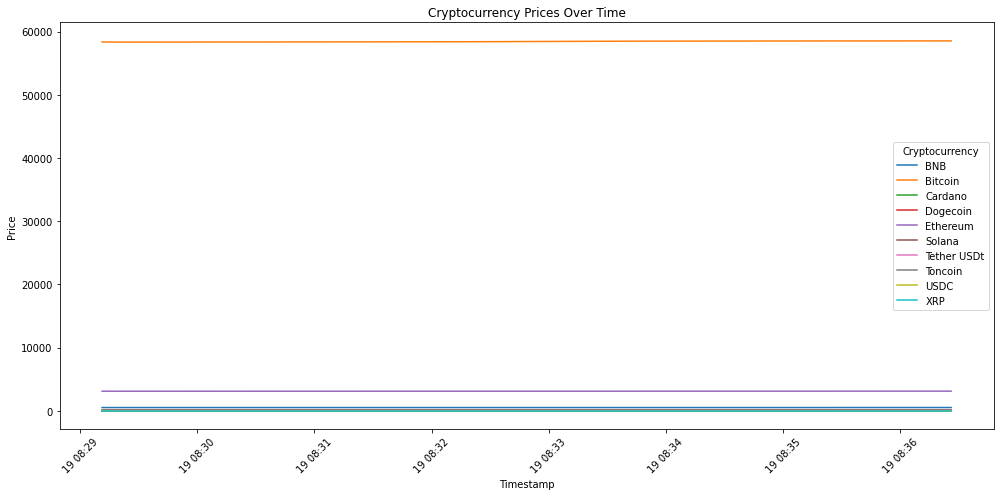

In [24]:
# Plotting the line chart
plt.figure(figsize=(14, 7))
for name in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[name], label=name)

# Adding labels and title
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Cryptocurrency Prices Over Time')
plt.legend(title='Cryptocurrency')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [26]:
df_bit = df3[df3['name'] == 'Bitcoin']
df_bit

,name,quote.EUR.price,timestamp
0,Bitcoin,58360.57953,2024-07-19 08:29:11.181627
0,Bitcoin,58340.30273,2024-07-19 08:29:24.270120
0,Bitcoin,58359.83145,2024-07-19 08:30:24.514650
0,Bitcoin,58382.38846,2024-07-19 08:31:24.799665
0,Bitcoin,58404.58457,2024-07-19 08:32:25.072844
0,Bitcoin,58475.63050,2024-07-19 08:33:25.323541
0,Bitcoin,58508.97757,2024-07-19 08:34:25.579144
0,Bitcoin,58527.59032,2024-07-19 08:35:25.856019
0,Bitcoin,58533.85984,2024-07-19 08:36:26.109149


In [41]:
df_bit['quote.EUR.price'].describe()

count       9.00000
mean    58432.63833
std        78.47684
min     58340.30273
25%     58360.57953
50%     58404.58457
75%     58508.97757
max     58533.85984
Name: quote.EUR.price, dtype: float64

<AxesSubplot:xlabel='timestamp', ylabel='quote.EUR.price'>

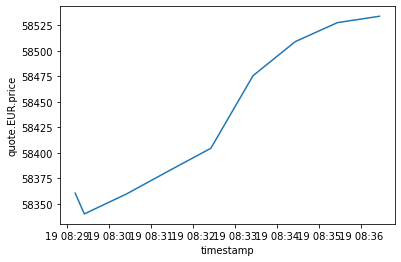

In [27]:
sns.lineplot(x = 'timestamp', y = 'quote.EUR.price', data = df_bit)

<AxesSubplot:xlabel='timestamp', ylabel='quote.EUR.price'>

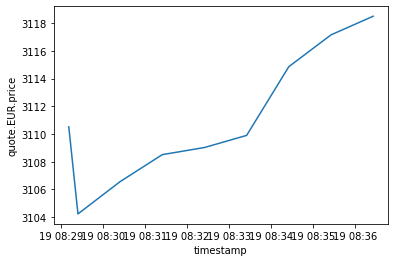

In [28]:
df_eth = df3[df3['name'] == 'Ethereum']
df_eth
sns.lineplot(x = 'timestamp', y = 'quote.EUR.price', data = df_eth)

<AxesSubplot:xlabel='timestamp', ylabel='quote.EUR.price'>

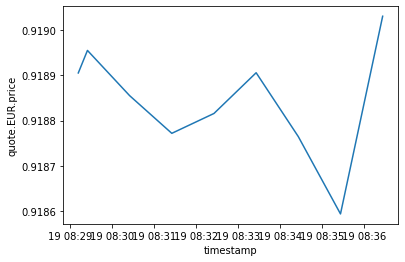

In [29]:
df_tether = df3[df3['name'] == 'Tether USDt']
df_tether
sns.lineplot(x = 'timestamp', y = 'quote.EUR.price', data = df_tether)

In [31]:
def volatility_cal(x):
    price_avg = x['quote.EUR.price'].mean()
    diff = x['quote.EUR.price'] - price_avg
    squared = diff**2
    ssd = squared.sum()
    variance = ssd/len(x['quote.EUR.price'])
    volatility = np.sqrt(variance)
    return volatility 
        

In [36]:
group = df3.groupby('name')
vola = group.apply(volatility_cal).reset_index()
vola.columns = ['name','volatility']
vola = vola.sort_values(by = 'volatility', ascending = False).reset_index(drop=True)
vola

,name,volatility
0,Bitcoin,73.98868
1,Ethereum,4.54924
2,BNB,0.84183
3,Solana,0.45391
4,Toncoin,0.00273
5,XRP,0.00081
6,Cardano,0.00062
7,Dogecoin,0.00019
8,Tether USDt,0.00012
9,USDC,0.00011


In [40]:
price = df3.groupby('name')['quote.EUR.price'].mean().reset_index()
price = price.sort_values(by = 'quote.EUR.price', ascending = False).reset_index(drop = True)
price

,name,quote.EUR.price
0,Bitcoin,58432.63833
1,Ethereum,3111.02948
2,BNB,522.43914
3,Solana,147.39582
4,Toncoin,6.67352
5,USDC,0.91897
6,Tether USDt,0.91884
7,XRP,0.50337
8,Cardano,0.38659
9,Dogecoin,0.10893
